In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms as T

import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [2]:
sys.path

['/home/shyam/myProjects/unet/notebooks',
 '/home/shyam/miniconda3/envs/pytorch1.1/lib/python37.zip',
 '/home/shyam/miniconda3/envs/pytorch1.1/lib/python3.7',
 '/home/shyam/miniconda3/envs/pytorch1.1/lib/python3.7/lib-dynload',
 '',
 '/home/shyam/miniconda3/envs/pytorch1.1/lib/python3.7/site-packages',
 '/home/shyam/miniconda3/envs/pytorch1.1/lib/python3.7/site-packages/IPython/extensions',
 '/home/shyam/.ipython',
 '/home/shyam/myProjects/unet']

In [3]:
from models import UNet
from datasets import kidney
from config import (config as cfg,
                    architecture as arch,
                    data_loaders as dl)

In [4]:
train_loader = dl.train_loader

In [5]:
tl = iter(train_loader)

In [6]:
sample = next(tl)
sample['image'].to(cfg.device)
sample['label'].to(cfg.device)

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 1., 1., 1.],
         [0., 0., 0.,  ..., 1., 1., 1.],
         [0., 0., 0.,  ..., 1., 1., 1.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 

In [7]:
import matplotlib.pyplot as plt

In [8]:
sample['label'].squeeze().size()

torch.Size([4, 400, 400])

In [9]:
sample['image'].squeeze().size()

torch.Size([4, 3, 400, 400])

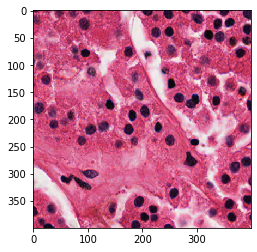

In [10]:
plt.imshow(sample['image'][3, :, :, :].permute(1, 2, 0).numpy())

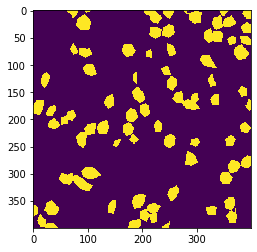

In [11]:
plt.imshow(sample['label'][3, :, :].numpy())

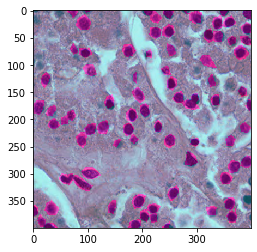

In [12]:
plt.imshow(sample['image'][3, :, :, :].permute(1, 2, 0).numpy())
plt.imshow(sample['label'][3, :, :].numpy(), cmap='cool', alpha=0.3)

In [13]:
model = arch.model.to(cfg.device)
optimizer = arch.optimizer
criterion = arch.criterion
resume_from_epoch = cfg.resume_from_epoch
min_val_loss = cfg.min_val_loss
device = cfg.device

if True:
    # Load values from checkpoint file
    checkpoint = torch.load('../checkpoints/model_final.pth')
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    resume_from_epoch = checkpoint['epoch']

In [14]:
min_val_loss

1000

In [15]:
resume_from_epoch

20

In [16]:
model.eval()

UNet(
  (input): _EncoderBlock(
    (encode): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace)
    )
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (enc1): _EncoderBlock(
    (encode): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace)
      (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
      (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace)
    )
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_m

In [17]:
model.eval()
prediction = model(sample['image'].to(cfg.device))

In [18]:
prediction.size()

torch.Size([4, 2, 400, 400])

In [19]:
y = prediction.squeeze()

In [20]:
y.size()

torch.Size([4, 2, 400, 400])

In [21]:
ynp = y[3].permute(1, 2, 0).detach().cpu().numpy()

In [22]:
ynp.shape

(400, 400, 2)

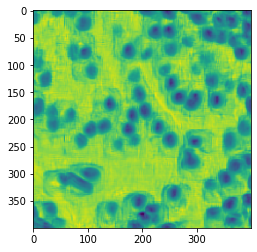

In [23]:
plt.imshow(ynp[:, :, 0])

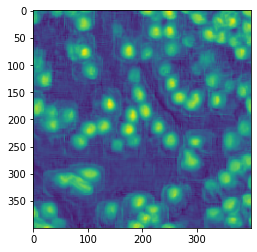

In [24]:
plt.imshow(ynp[:, :, 1])

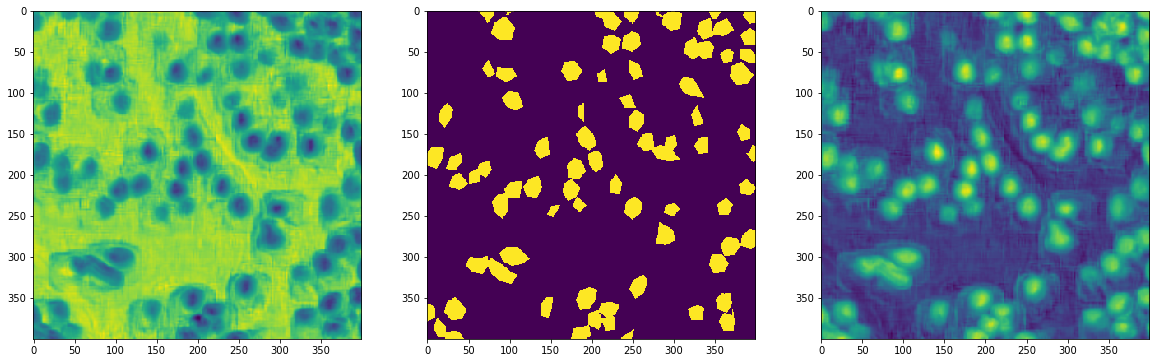

In [25]:
fig, ax = plt.subplots(1, 3,figsize=(20, 20))
ax[0].imshow(ynp[:, :, 0])
ax[1].imshow(sample['label'][3].squeeze().detach().cpu().numpy())
ax[2].imshow(ynp[:, :, 1])

In [26]:
import numpy as np
np.unique(ynp)

array([-5.767229 , -5.601458 , -5.5486403, ...,  4.068184 ,  4.12399  ,
        4.2808633], dtype=float32)

In [27]:
ynp.shape

(400, 400, 2)

In [28]:
ynpn= np.abs(ynp)/np.max(np.abs(ynp))

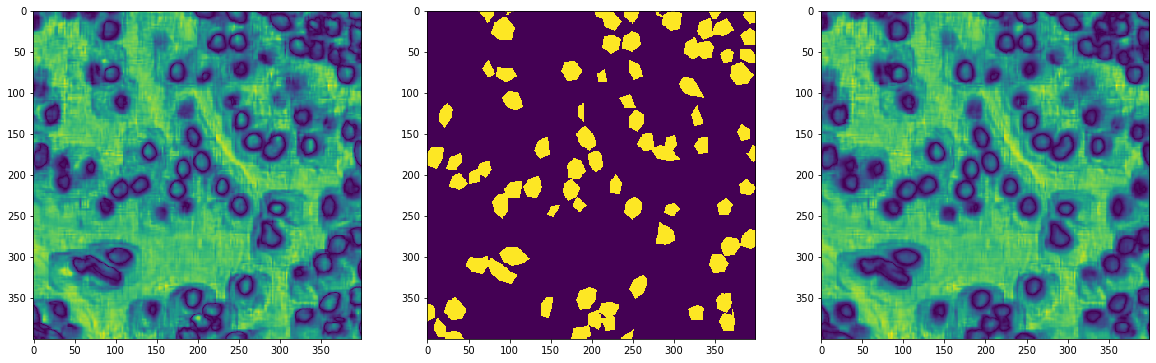

In [29]:
fig, ax = plt.subplots(1, 3,figsize=(20, 20))
ax[0].imshow(ynpn[:, :, 0])
ax[1].imshow(sample['label'][3].squeeze().detach().cpu().numpy())
ax[2].imshow(ynpn[:, :, 1])

## Postprocessing the predicted, normalized image

In [30]:
import numpy as np
import cv2

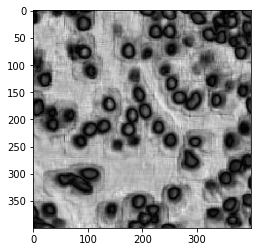

In [48]:
ycv = np.array(np.round(ynpn*255, decimals=0)[:, :, 1], dtype=np.uint8)
plt.imshow(ycv, 'gray')
type(ycv), ycv.dtype, ycv.shape
img = ycv
from PIL import Image
img_PIL = Image.fromarray(img)
img_PIL.save('../results/before_post.jpg')

In [50]:
img_original = cv2.imread('../results/before_post.jpg')
img = cv2.imread('../results/before_post.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

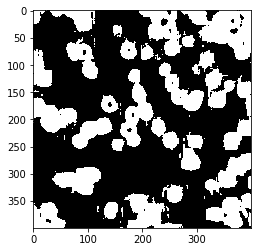

In [51]:
ret, bin_image = cv2.threshold(gray, 127, 255, 
                               cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.imshow(bin_image, 'gray')

In [52]:
kernel = np.ones((1, 1), np.uint8)
kernel1 = np.ones((3, 3), np.uint8)

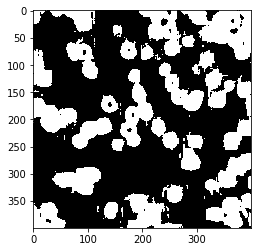

In [53]:
closing = cv2.morphologyEx(bin_image, cv2.MORPH_CLOSE,
                          kernel, iterations=1)
plt.imshow(closing, 'gray')

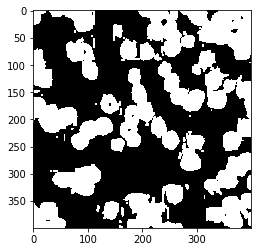

In [54]:
sure_bg = cv2.dilate(closing, kernel1, iterations=1)
plt.imshow(sure_bg, 'gray')

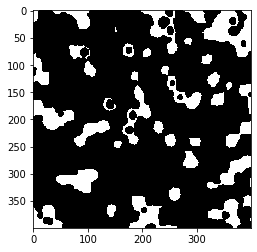

In [55]:
dist_transform = cv2.distanceTransform(closing, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 
                            0.2*dist_transform.max(), 
                            255, 0)
sure_fg = np.uint8(sure_fg)
plt.imshow(sure_fg, 'gray')

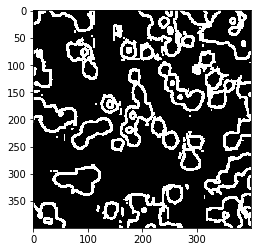

In [56]:
unknown = cv2.subtract(sure_bg, sure_fg)
plt.imshow(unknown, 'gray')

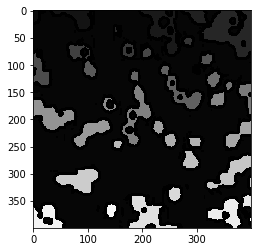

In [58]:
ret, markers = cv2.connectedComponents(sure_fg)
markers_plus1 = markers + 1
markers_plus1[unknown == 255] = 0

plt.imshow(markers_plus1, 'gray')

In [60]:
markers_watershed = cv2.watershed(img, markers_plus1)

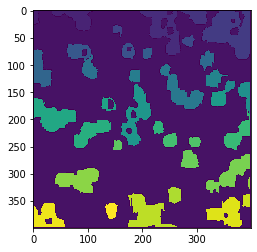

In [61]:
plt.imshow(markers_watershed)

In [63]:
img_x, img_y = img_original.shape[0], img_original.shape[1]
white, white_color = np.zeros((img_x, img_y, 3)), np.zeros((img_x, img_y, 3))
white += 255
white_color += 255

In [65]:
white[markers_watershed != 1] = [0, 0, 0]
white_color[markers_watershed != 1] = [255, 0, 0]

In [66]:
white_np = np.asarray(white)
watershed_grayscale = white_np.transpose(2, 0, 1)[0, :, :]
img[markers_watershed != 1] = [255, 0, 0]

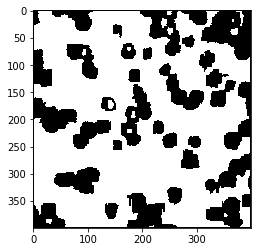

In [67]:
plt.imshow(watershed_grayscale, 'gray')